In [2]:
!pip install pandas matplotlib

   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------  7.9/8.0 MB 48.7 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 38.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 25.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 29.5 MB/s eta 0:00:00


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [4]:
def obter_dados_filtrados(caminho_csv, data_inicial, data_final):
    """
    Carrega dados de um arquivo CSV e filtra por um intervalo de datas.

    Args:
        caminho_csv (str): Caminho para o arquivo CSV.
        data_inicial (str): Data inicial no formato 'yyyy-MM-dd'.
        data_final (str): Data final no formato 'yyyy-MM-dd'.

    Returns:
        pd.DataFrame: DataFrame contendo apenas os dados dentro do intervalo de datas.
    """
    # Carregar o CSV em um DataFrame
    df = pd.read_csv(caminho_csv)

    # Converter a coluna 'Data' para o tipo datetime
    df['Data'] = pd.to_datetime(df['Data'])

    # Filtrar os dados pelo intervalo de datas
    df_filtrado = df[(df['Data'] >= pd.to_datetime(data_inicial)) & (df['Data'] <= pd.to_datetime(data_final))]

    return df_filtrado

C:\Users\flavio.lopes\AppData\Local\Temp\ipykernel_16576\1237732598.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_resampled = df.resample('M').last().dropna()  # 'M' para agrupar por mês, usa o último dia de cada mês


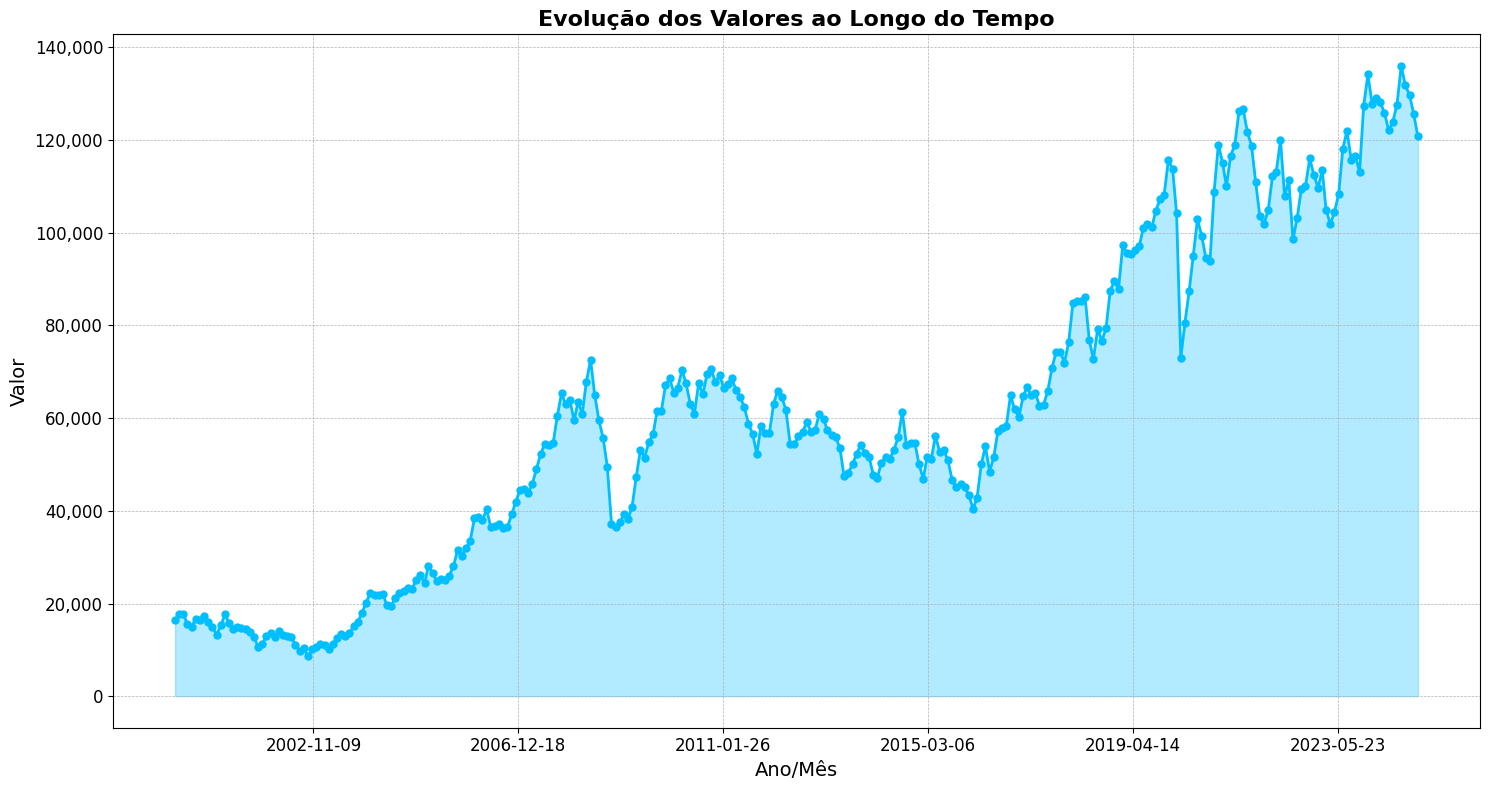

In [5]:
# Carregar os dados e filtrar pelo intervalo desejado
caminho_csv = "ibovespa_diario.csv"  # Substitua pelo caminho correto do seu arquivo
df = obter_dados_filtrados(caminho_csv, '2000-01-01', '2025-01-01')

# Converter a coluna 'Data' para índice
df.set_index('Data', inplace=True)

# Agrupar os dados para obter o último valor de cada mês
df_resampled = df.resample('M').last().dropna()  # 'M' para agrupar por mês, usa o último dia de cada mês

# Configurar o gráfico
plt.figure(figsize=(15, 8))

# Criar a linha com marcações (pontos) e área preenchida
plt.plot(df_resampled.index, df_resampled['Valor'], color='deepskyblue', marker='o', linestyle='-', linewidth=2, markersize=5)
plt.fill_between(df_resampled.index, df_resampled['Valor'], color='deepskyblue', alpha=0.3)

# Configurações de estilo
plt.grid(visible=True, which='major', linestyle='--', linewidth=0.5)
plt.title("Evolução dos Valores ao Longo do Tempo", fontsize=16, weight='bold')
plt.xlabel("Ano/Mês", fontsize=14)
plt.ylabel("Valor", fontsize=14)

# Ajustar o formato dos eixos
plt.tick_params(axis='both', which='major', labelsize=12)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))  # Reduz o número de marcas no eixo X
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))  # Formatação com separador de milhar

# Exibir o gráfico
plt.tight_layout()
plt.show()